### Data visualization

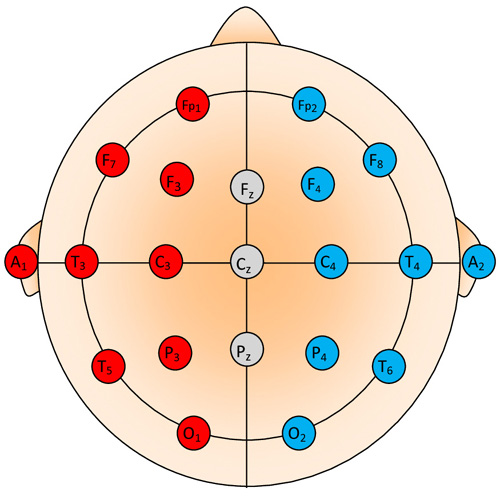

In [2]:
root = 'C:/Users/Haiya/Downloads/OneDrive_2025-09-19/patient_data_clean/'

In [4]:
csv = 'ID5-1_609_10.5.20.csv'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

In [8]:
csv_path = Path(root + csv)

# Load (try utf-8 first; fall back to latin-1 if needed)
try:
    df = pd.read_csv(csv_path)
except UnicodeDecodeError:
    df = pd.read_csv(csv_path, encoding="latin-1")

# Convert columns that look like "[...]" into lists
def parse_listlike(x):
    if isinstance(x, str):
        s = x.strip()
        if s.startswith('[') and s.endswith(']'):
            try:
                return ast.literal_eval(s)
            except Exception:
                return x
    return x
df = df.applymap(parse_listlike)

# Force the first two column names
cols = list(df.columns)
cols[0] = "ClockDateTime"
cols[1] = "Time"
df.columns = cols


C:\Users\Haiya\AppData\Local\Temp\ipykernel_19420\3687188013.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(parse_listlike)


In [9]:
df.head()

,ClockDateTime,Time,"ADR global, 8-13/1-4 Hz, All 1020 No FP","ADR left, 8-13/1-4 Hz, Left Hemi (No Fp)","ADR right, 8-13/1-4 Hz, Right Hemi (No Fp)","TDR global , 4-8/1-4 Hz, All 1020 No FP","TDR left, 4-8/1-4 Hz, Left Hemi (No Fp)","TDR left, 4-8/1-4 Hz, Right Hemi (No Fp)","ATDR global , 4-13/1-4 Hz, All 1020 No FP","ATDR left, 4-13/1-4 Hz, Left Hemi (No Fp)",...,"Amplitude 5th%ile 1 hour, SumValuesMin, aEEG All 1020 No FP_avg, [aEEG All 1020 No FP_avg]","Amplitude 95%ile 1 hour, SumValuesMax, aEEG All 1020 No FP_avg, [aEEG All 1020 No FP_avg]","Rel alpha variability left, FFT PowerRatio, 6-14/1-20 Hz, Left Hemisphere","Rel alpha varibility right , FFT PowerRatio, 6-14/1-20 Hz, Right Hemisphere","Asymmetry, Absolute Index (EASI) , 0 - 20 Hz, Asym Hemi","Asymmetry, Relative Index (REASI) 0-5 hz, 0 - 5 Hz, Asym Hemi","Asymmetry, Relative Index (REASI) 6-14 hz, 6 - 14 Hz, Asym Hemi","Asymmetry, Relative Index (REASI) 0 -20hz, 0 - 20 Hz, Asym Hemi",Seizure probability,Comment
0,1277616.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1277617.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.74490,16.6332,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1277618.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.52941,13.2034,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,1277619.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.58494,13.2034,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,1277620.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06649,13.2034,0.0,0.0,0.0,0.0,0.0,0.0,0,0


### Asymetric

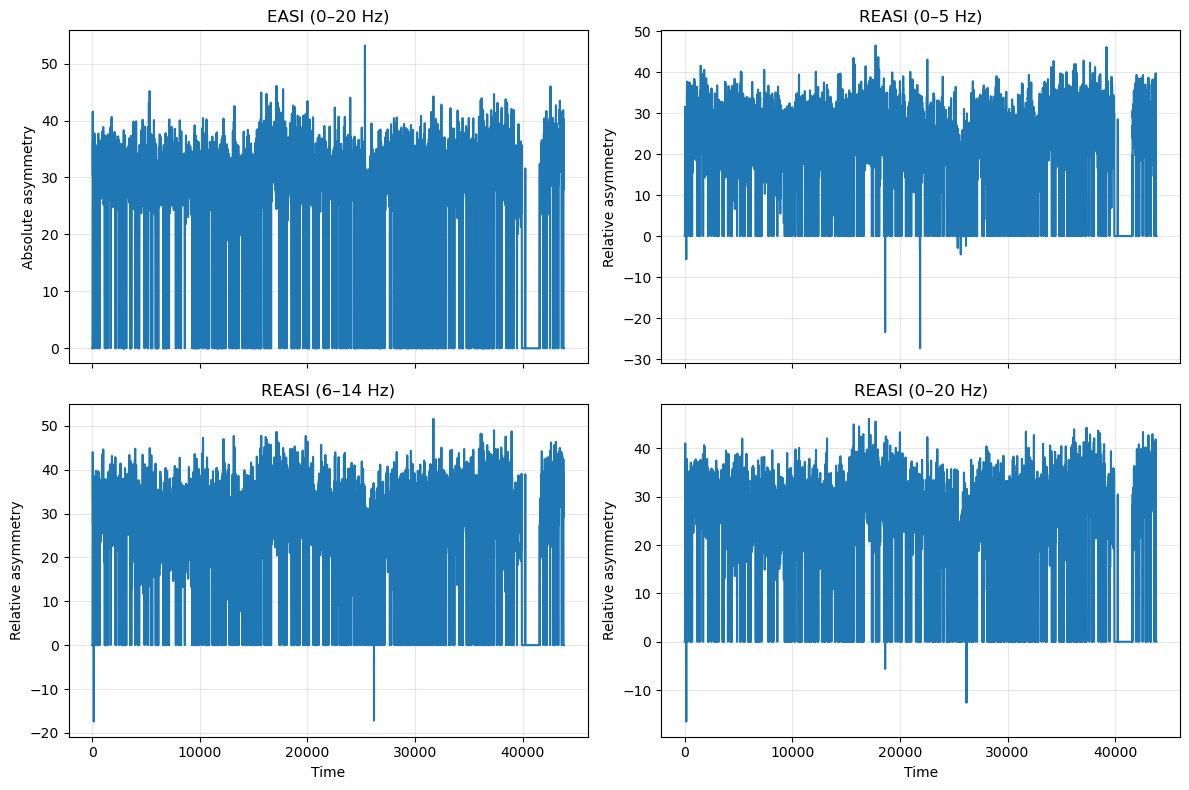

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Column names (adjust if needed)
col_easi      = "Asymmetry, Absolute Index (EASI) , 0 - 20 Hz, Asym Hemi"
col_reasi_05  = "Asymmetry, Relative Index (REASI) 0-5 hz, 0 - 5 Hz, Asym Hemi"
col_reasi_614 = "Asymmetry, Relative Index (REASI) 6-14 hz, 6 - 14 Hz, Asym Hemi"
col_reasi_020 = "Asymmetry, Relative Index (REASI) 0 -20hz, 0 - 20 Hz, Asym Hemi"

# Use raw numeric Time; NaN -> 0
ts = pd.to_numeric(df["Time"], errors="coerce").fillna(0)

# y-series numeric; NaN -> 0
y_easi      = pd.to_numeric(df[col_easi     ], errors="coerce").fillna(0)
y_reasi_05  = pd.to_numeric(df[col_reasi_05 ], errors="coerce").fillna(0)
y_reasi_614 = pd.to_numeric(df[col_reasi_614], errors="coerce").fillna(0)
y_reasi_020 = pd.to_numeric(df[col_reasi_020], errors="coerce").fillna(0)

# (optional) sort by Time so lines draw left→right; keeps ALL rows
order = ts.sort_values().index
ts_plot     = ts.loc[order]
y_easi      = y_easi.loc[order]
y_reasi_05  = y_reasi_05.loc[order]
y_reasi_614 = y_reasi_614.loc[order]
y_reasi_020 = y_reasi_020.loc[order]

# 2×2 plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.ravel()

axes[0].plot(ts_plot, y_easi)
axes[0].set_title("EASI (0–20 Hz)")
axes[0].set_ylabel("Absolute asymmetry")

axes[1].plot(ts_plot, y_reasi_05)
axes[1].set_title("REASI (0–5 Hz)")
axes[1].set_ylabel("Relative asymmetry")

axes[2].plot(ts_plot, y_reasi_614)
axes[2].set_title("REASI (6–14 Hz)")
axes[2].set_ylabel("Relative asymmetry")
axes[2].set_xlabel("Time")

axes[3].plot(ts_plot, y_reasi_020)
axes[3].set_title("REASI (0–20 Hz)")
axes[3].set_ylabel("Relative asymmetry")
axes[3].set_xlabel("Time")

for ax in axes:
    ax.grid(True, alpha=0.3)

fig.tight_layout()
plt.show()


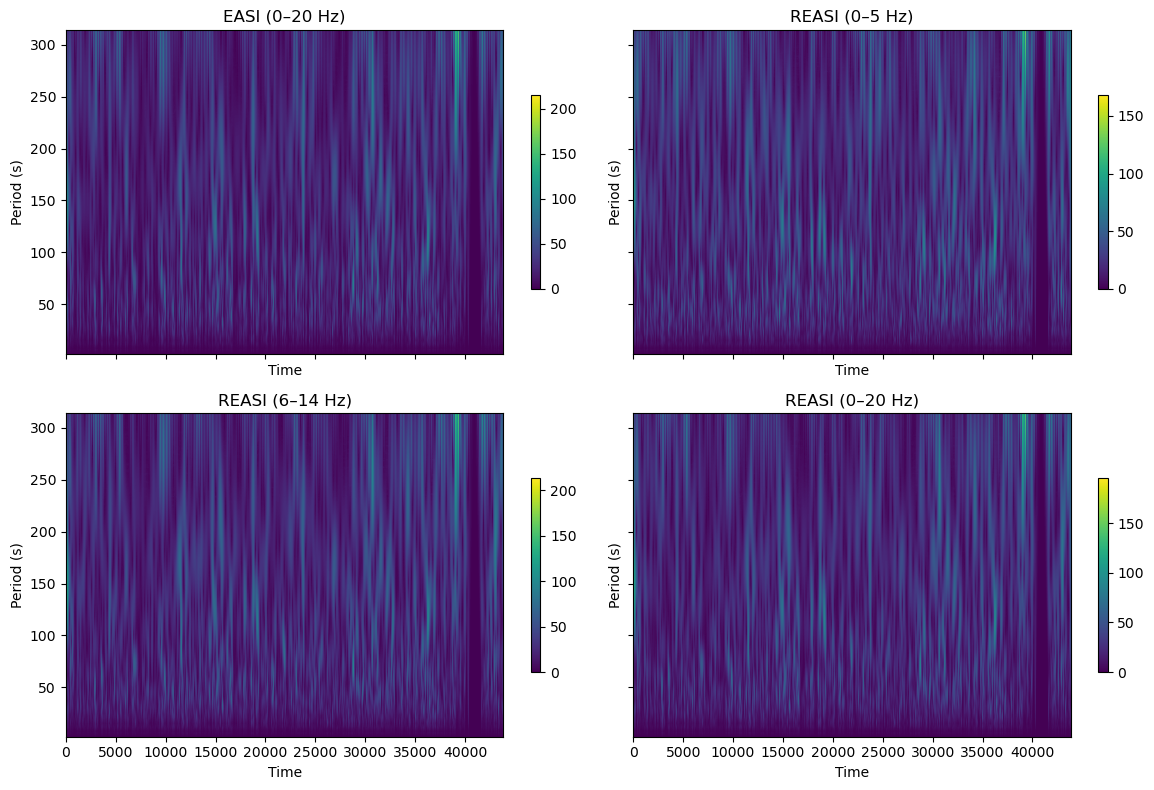

In [13]:
signals = [
    (y_easi, "EASI (0–20 Hz)"),
    (y_reasi_05, "REASI (0–5 Hz)"),
    (y_reasi_614, "REASI (6–14 Hz)"),
    (y_reasi_020, "REASI (0–20 Hz)")
]

wavelet = 'morl'
dt = 1.0  # seconds per sample; change if different
fc = pywt.central_frequency(wavelet)     # ~0.8125 for morl
f_nyq = 0.5 / dt                         # Hz
min_scale = int(np.ceil(fc / f_nyq))     # ensure f <= Nyquist
scales = np.arange(max(2, min_scale), 256)

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
axes = axes.ravel()

for ax, (sig, title) in zip(axes, signals):
    coeffs, freqs = pywt.cwt(sig, scales, wavelet, sampling_period=dt)  # freqs in Hz
    periods = 1.0 / freqs                                               # seconds
    im = ax.imshow(
        np.abs(coeffs),
        extent=[ts.min(), ts.max(), periods.min(), periods.max()],
        cmap='viridis', aspect='auto', origin='lower'
    )
    ax.set_title(title)
    ax.set_ylabel("Period (s)")
    ax.set_xlabel("Time")
    fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.6)

plt.tight_layout()
plt.show()

### Raw signal

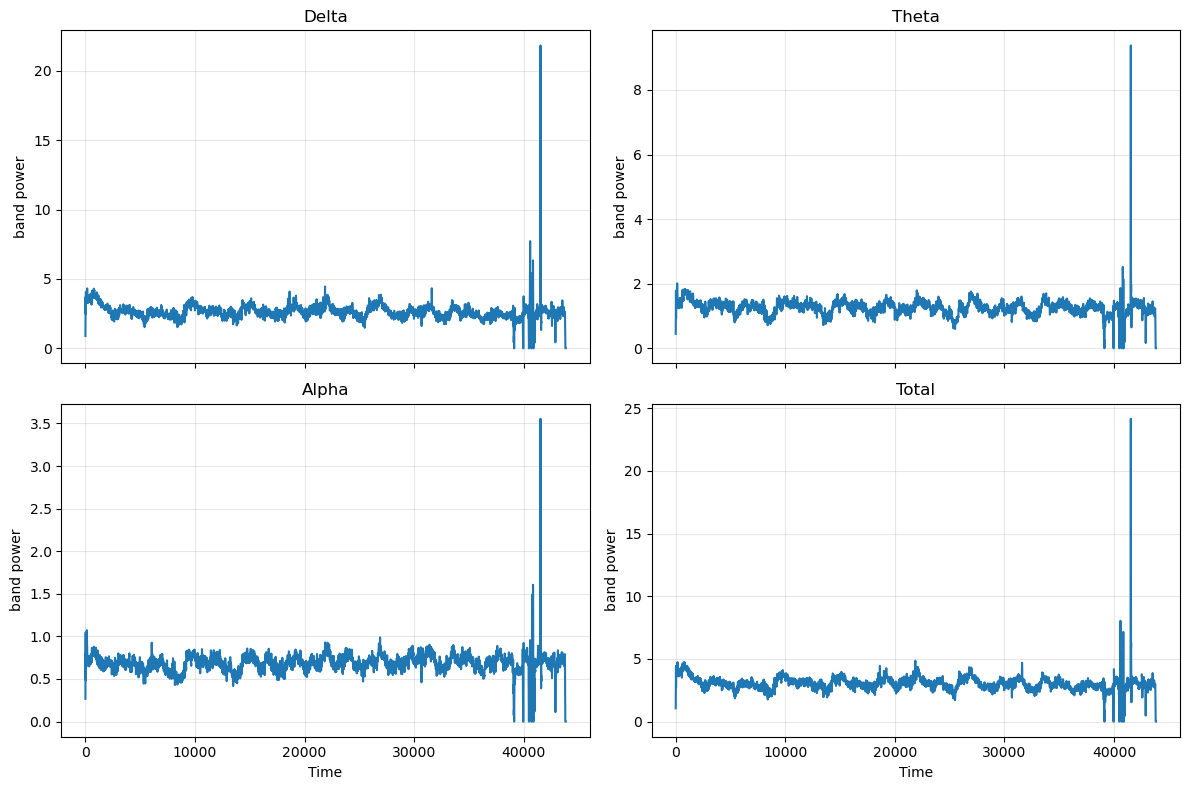

In [18]:
# Column names (adjust if needed)
Delta      = "Delta total FFT, 1 - 4 Hz, All 1020 No FP"
Theta  = "Theta total FFT, 4 - 8 Hz, All 1020 No FP"
Alpha = "Alpha total FFT, 8 - 13 Hz, All 1020 No FP"
Total = "Total pwr global, 1 - 20 Hz, All 1020 No FP"

# Use raw numeric Time; NaN -> 0
ts = pd.to_numeric(df["Time"], errors="coerce").fillna(0)

# y-series numeric; NaN -> 0
Delta      = pd.to_numeric(df[Delta     ], errors="coerce").fillna(0)
Theta  = pd.to_numeric(df[Theta ], errors="coerce").fillna(0)
Alpha = pd.to_numeric(df[Alpha], errors="coerce").fillna(0)
Total = pd.to_numeric(df[Total], errors="coerce").fillna(0)

# (optional) sort by Time so lines draw left→right; keeps ALL rows
order = ts.sort_values().index
ts_plot     = ts.loc[order]
y_easi      = Delta.loc[order]
y_reasi_05  = Theta.loc[order]
y_reasi_614 = Alpha.loc[order]
y_reasi_020 = Total.loc[order]

k = np.ones(25, dtype=float) / 25.0
y_easi      = np.convolve(y_easi.values,      k, mode="same")
y_reasi_05  = np.convolve(y_reasi_05.values,  k, mode="same")
y_reasi_614 = np.convolve(y_reasi_614.values, k, mode="same")
y_reasi_020 = np.convolve(y_reasi_020.values, k, mode="same")


# 2×2 plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.ravel()

axes[0].plot(ts_plot, y_easi)
axes[0].set_title("Delta")
axes[0].set_ylabel("band power")

axes[1].plot(ts_plot, y_reasi_05)
axes[1].set_title("Theta")
axes[1].set_ylabel("band power")

axes[2].plot(ts_plot, y_reasi_614)
axes[2].set_title("Alpha")
axes[2].set_ylabel("band power")
axes[2].set_xlabel("Time")

axes[3].plot(ts_plot, y_reasi_020)
axes[3].set_title("Total")
axes[3].set_ylabel("band power")
axes[3].set_xlabel("Time")

for ax in axes:
    ax.grid(True, alpha=0.3)

fig.tight_layout()
plt.show()


### Left vs right WTC

Text(0, 0.5, 'band power')

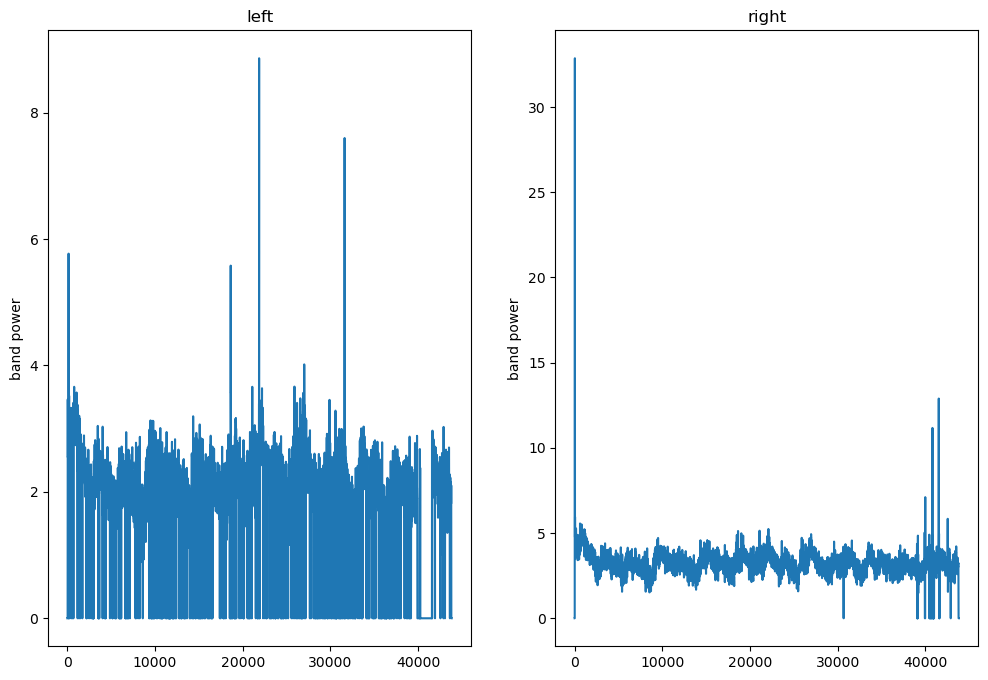

In [23]:
factor1 = "Total pwr left, 1 - 20 Hz, Left Hemi (No Fp)"
factor2 = "Total pwr right, 1 - 20 Hz, Right Hemi (No Fp)"

left      = "Total pwr left, 1 - 20 Hz, Left Hemi (No Fp)"
right  = "Total pwr right, 1 - 20 Hz, Right Hemi (No Fp)"
ts = pd.to_numeric(df["Time"], errors="coerce").fillna(0)
left      = pd.to_numeric(df[left     ], errors="coerce").fillna(0)
right  = pd.to_numeric(df[right ], errors="coerce").fillna(0)
# 
order = ts.sort_values().index
ts_plot     = ts.loc[order]
left      = left.loc[order]
right  = right.loc[order]
# 
# 1×2 plot
fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True)
axes = axes.ravel()

axes[0].plot(ts_plot, left)
axes[0].set_title("left")
axes[0].set_ylabel("band power")

axes[1].plot(ts_plot, right)
axes[1].set_title("right")
axes[1].set_ylabel("band power")

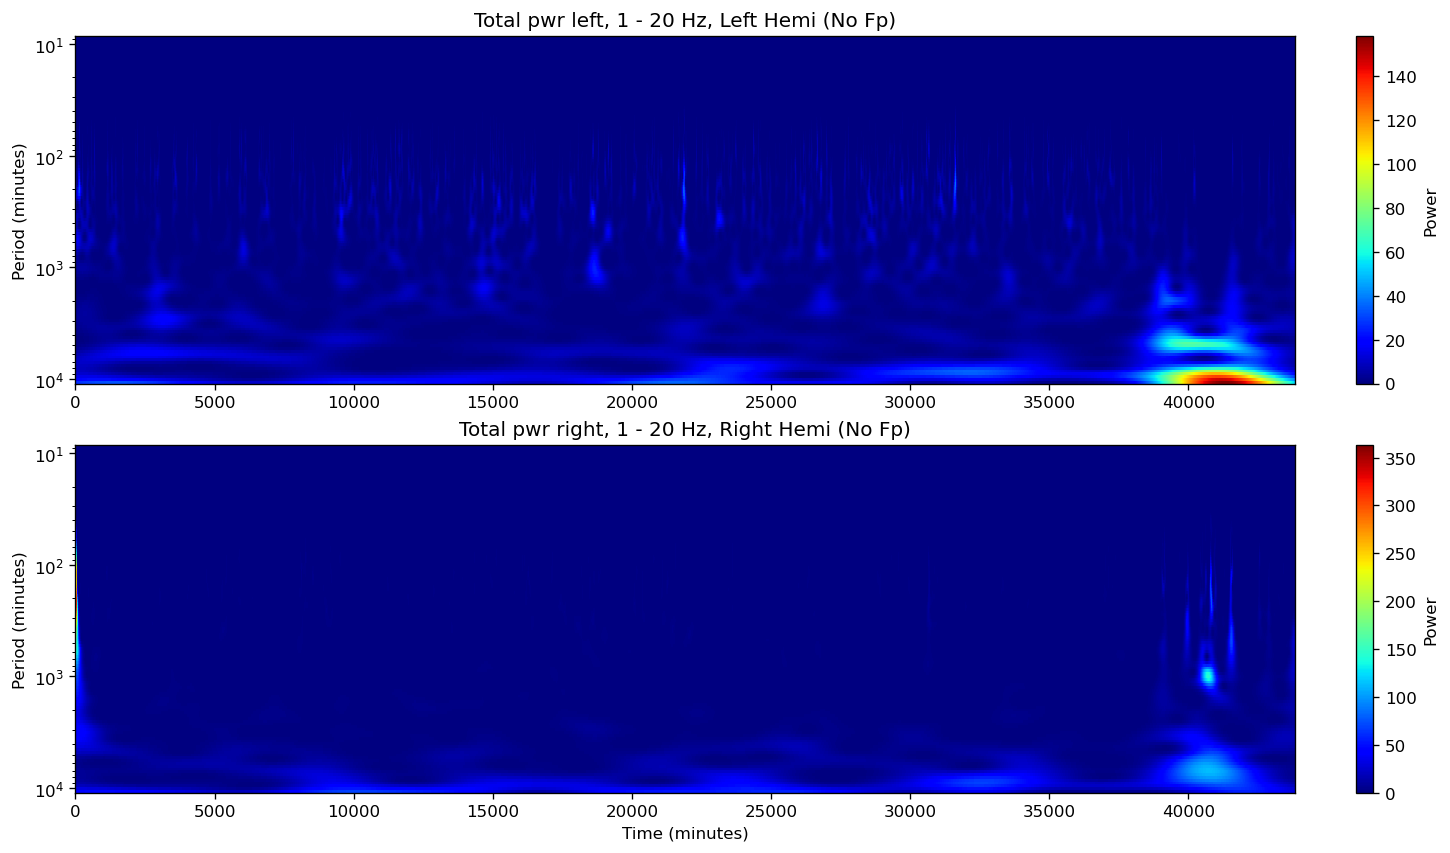

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from pycwt import wavelet

t_raw = df['Time'].to_numpy(float)
x_raw = df[factor1].to_numpy(float)
y_raw = df[factor2].to_numpy(float)

# -------------------
# Helpers
# -------------------
def interp_uniform_safe(t, s, max_points=10000):
    """Uniform grid with bounded size; removes NaNs & duplicate timestamps."""
    m = np.isfinite(t) & np.isfinite(s)
    t = np.asarray(t[m], float)
    s = np.asarray(s[m], float)
    if t.size < 2:
        raise ValueError("Not enough points after filtering.")
    order = np.argsort(t)
    t = t[order]; s = s[order]

    # collapse exact duplicate times
    dt = np.diff(t)
    keep = np.hstack(([True], dt != 0))
    t_u = t[keep]; s_u = s[keep]

    n_target = min(max_points, max(2, t_u.size))
    t_uni = np.linspace(t_u[0], t_u[-1], n_target)
    s_uni = np.interp(t_uni, t_u, s_u)
    eff_dt = (t_uni[-1] - t_uni[0]) / (n_target - 1)
    return t_uni, s_uni, float(eff_dt)

def centers_to_edges(c):
    """Convert center coords -> edges of length len(c)+1 (for shading='flat')."""
    c = np.asarray(c, float).ravel()
    if c.size < 2:
        return np.array([c[0]-0.5, c[0]+0.5], float)
    dc = np.diff(c)
    e = np.empty(c.size + 1, float)
    e[1:-1] = c[:-1] + dc/2
    e[0]    = c[0]  - dc[0]/2
    e[-1]   = c[-1] + dc[-1]/2
    return e

def cwt_wrap(sig, dt, dj, s0, J, wv='morlet'):
    """Return (W, scales, coi) across pycwt variants."""
    out = wavelet.cwt(sig, dt, dj=dj, s0=s0, J=J, wavelet=wv)
    W, scales = out[0], out[1]
    coi = out[3] if len(out) >= 4 else None
    return W, np.asarray(scales, float), (None if coi is None else np.asarray(coi, float))

# -------------------
# Uniformize both signals on the same grid
# -------------------
t, x, dt = interp_uniform_safe(t_raw, x_raw, max_points=10000)
_, y, _  = interp_uniform_safe(t_raw, y_raw, max_points=len(t))

# Z-score each
def zscore(a):
    a = np.asarray(a, float)
    mu, sd = a.mean(), a.std()
    return (a - mu) / (sd if sd else 1.0)

x = zscore(x)
y = zscore(y)

# -------------------
# Scale ladder (time unit = minutes)
# -------------------
VOICES = 12
dj = 1.0 / VOICES
W0 = 6.0
FOURIER_FACTOR = 4*np.pi / (W0 + np.sqrt(2 + W0**2))  # ~1.033

period_min = 2.0 * dt
period_max = (t[-1] - t[0]) / 4.0
s0   = period_min / (FOURIER_FACTOR * dt)
smax = period_max / (FOURIER_FACTOR * dt)
J    = int(np.floor(np.log2(smax / s0) / dj))

# -------------------
# CWTs
# -------------------
Wx, scales, _  = cwt_wrap(x, dt, dj, s0, J, wv='morlet')
Wy, scales2, _ = cwt_wrap(y, dt, dj, s0, J, wv='morlet')
# (scales2 should match scales)
periods = FOURIER_FACTOR * scales * dt  # minutes

Px = np.abs(Wx)**2
Py = np.abs(Wy)**2

# -------------------
# Plot scalograms with correct edges
# -------------------
Ns_x, Nt_x = Px.shape
Ns_y, Nt_y = Py.shape

# Build edges that match each C's shape
t_edges_x = centers_to_edges(t[:Nt_x])         # length Nt_x + 1
p_edges_x = centers_to_edges(periods[:Ns_x])   # length Ns_x + 1

t_edges_y = centers_to_edges(t[:Nt_y])         # length Nt_y + 1
p_edges_y = centers_to_edges(periods[:Ns_y])   # length Ns_y + 1

fig, axes = plt.subplots(2, 1, figsize=(12, 7), dpi=120, constrained_layout=True)

# Top: factor1
ax = axes[0]
im = ax.pcolormesh(t_edges_x, p_edges_x, Px, cmap='jet', shading='flat')
ax.set_title(factor1)
ax.set_ylabel('Period (minutes)')
ax.set_yscale('log'); ax.invert_yaxis()
fig.colorbar(im, ax=ax, label='Power')

# Bottom: factor2
ax = axes[1]
im = ax.pcolormesh(t_edges_y, p_edges_y, Py, cmap='jet', shading='flat')
ax.set_title(factor2)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Period (minutes)')
ax.set_yscale('log'); ax.invert_yaxis()
fig.colorbar(im, ax=ax, label='Power')

plt.show()

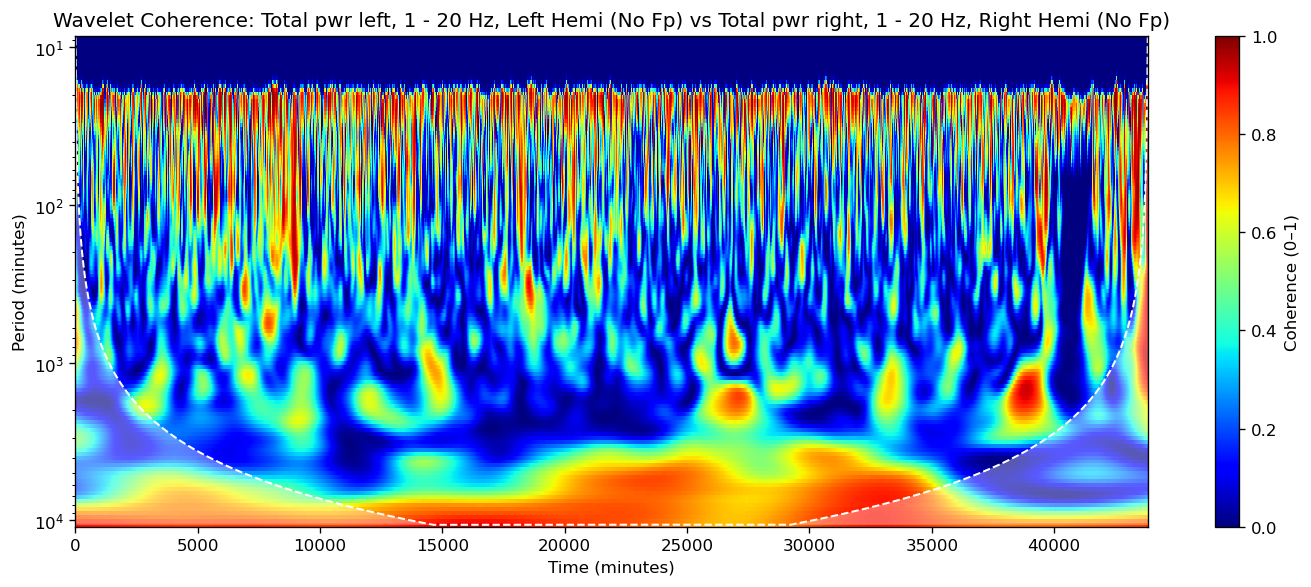

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from pycwt import wavelet

# =========================
# Helpers
# =========================
def _prep_unique_sorted(t, s):
    """Keep finite, sort by time, collapse duplicate timestamps."""
    m = np.isfinite(t) & np.isfinite(s)
    t = np.asarray(t[m], float)
    s = np.asarray(s[m], float)
    if t.size < 2:
        raise ValueError("Not enough points after filtering.")
    order = np.argsort(t)
    t = t[order]; s = s[order]
    dt = np.diff(t)
    keep = np.hstack(([True], dt != 0))
    return t[keep], s[keep]

def centers_to_edges(c):
    """Convert centers -> edges (len+1) for pcolormesh(shading='flat')."""
    c = np.asarray(c, float).ravel()
    if c.size < 2:
        return np.array([c[0]-0.5, c[0]+0.5], float)
    dc = np.diff(c)
    e = np.empty(c.size + 1, float)
    e[1:-1] = c[:-1] + dc/2
    e[0]    = c[0]  - dc[0]/2
    e[-1]   = c[-1] + dc[-1]/2
    return e

def cwt_wrap(sig, dt, dj, s0, J, wv='morlet'):
    """Return (W, scales, coi) robustly across pycwt variants."""
    out = wavelet.cwt(sig, dt, dj=dj, s0=s0, J=J, wavelet=wv)
    W, scales = out[0], out[1]
    coi = out[3] if len(out) >= 4 else None
    return W, np.asarray(scales, float), (None if coi is None else np.asarray(coi, float))

def _smooth_time_scale(A, scales, dt, dj):
    """Gaussian time smoothing (σ≈√2·scale/dt) + boxcar across scales (~1/dj)."""
    A = np.asarray(A)
    Ns, Nt = A.shape
    out = np.empty((Ns, Nt), dtype=np.complex128)
    scales = np.asarray(scales, float).ravel()
    for i, s in enumerate(scales):
        sigma_t = max(1e-9, np.sqrt(2.0) * (s / dt))   # in samples
        L = int(np.ceil(6.0 * sigma_t))                # ~±3σ
        if 2*L + 1 > Nt:
            L = max(1, (Nt - 1) // 2)
        if L < 1:
            out[i, :] = A[i, :]
            continue
        kx = np.arange(-L, L + 1, dtype=float)
        g = np.exp(-(kx**2) / (2.0 * sigma_t**2)); g /= g.sum()
        conv = np.convolve(A[i, :], g, mode='same')
        out[i, :] = conv[:Nt]
    # scale smoothing
    w = max(1, int(round(1.0 / dj)))
    if w > 1:
        box = np.ones(w, dtype=float) / w
        for tcol in range(Nt):
            out[:, tcol] = np.convolve(out[:, tcol], box, mode='same')[:Ns]
    return out

def wtc_from_cwt(Wx, Wy, scales, dt, dj, eps=1e-12):
    """Grinsted/Torrence WTC from CWTs."""
    scales = np.asarray(scales, float).ravel()
    s_inv = (1.0 / scales)[:, None]
    Wxy = Wx * np.conj(Wy)
    Sxy = _smooth_time_scale(Wxy * s_inv, scales, dt, dj)
    Sxx = _smooth_time_scale((np.abs(Wx)**2) * s_inv, scales, dt, dj)
    Syy = _smooth_time_scale((np.abs(Wy)**2) * s_inv, scales, dt, dj)
    WCT = (np.abs(Sxy)**2) / (Sxx * Syy + eps)
    return np.clip(WCT.real, 0.0, 1.0)

def coi_to_period(coi, scales, dt, fourier_factor):
    """If COI looks like scales, convert to period; else assume already period."""
    coi = np.asarray(coi, float).ravel()
    scales = np.asarray(scales, float).ravel()
    if np.nanmax(coi) <= np.nanmax(scales) * 1.05:
        return fourier_factor * coi * dt
    return coi

def match_len(x_ref, y):
    y = np.asarray(y, float).ravel(); x_ref = np.asarray(x_ref, float).ravel()
    if y.size == x_ref.size: return y
    idx = np.linspace(0, y.size - 1, x_ref.size)
    return np.interp(idx, np.arange(y.size), y)

# =========================
# Data (assumes df, factor1, factor2 exist; Time in minutes)
# =========================
t_raw = df['Time'].to_numpy(float)
x_raw = df[factor1].to_numpy(float)
y_raw = df[factor2].to_numpy(float)

# =========================
# Shared uniform grid (fixes Wx/Wy mismatch)
# =========================
tx_u, x_u = _prep_unique_sorted(t_raw, x_raw)
ty_u, y_u = _prep_unique_sorted(t_raw, y_raw)

t0 = max(tx_u[0], ty_u[0])
t1 = min(tx_u[-1], ty_u[-1])
if not (t1 > t0):
    raise ValueError("No overlapping time interval between the two signals.")

n_target = int(min(10000, tx_u.size, ty_u.size))
n_target = max(n_target, 1024)
t = np.linspace(t0, t1, n_target).astype(float)
dt = float((t[-1] - t[0]) / (n_target - 1))

x = np.interp(t, tx_u, x_u)
y = np.interp(t, ty_u, y_u)

# z-score (recommended)
def z(a):
    a = np.asarray(a, float)
    mu, sd = a.mean(), a.std()
    return (a - mu) / (sd if sd else 1.0)

x = z(x); y = z(y)

# =========================
# Scale ladder (minutes)
# =========================
VOICES = 12
dj = 1.0 / VOICES
W0 = 6.0
FOURIER_FACTOR = 4*np.pi / (W0 + np.sqrt(2 + W0**2))  # ~1.033

period_min = 2.0 * dt
period_max = (t[-1] - t[0]) / 4.0
s0   = period_min / (FOURIER_FACTOR * dt)
smax = period_max / (FOURIER_FACTOR * dt)
J    = int(np.floor(np.log2(smax / s0) / dj))

# =========================
# CWTs
# =========================
Wx, scales, coi_x = cwt_wrap(x, dt, dj, s0, J, wv='morlet')
Wy, scales2, coi_y = cwt_wrap(y, dt, dj, s0, J, wv='morlet')  # should match 'scales'
periods = FOURIER_FACTOR * scales * dt  # minutes

# =========================
# WTC (from CWTs)
# =========================
WCT = wtc_from_cwt(Wx, Wy, scales, dt, dj)

# COI for WTC: conservative min, in period units, matched to t
coi_period = None
if coi_x is not None and coi_y is not None:
    coi_min = np.minimum(coi_x, coi_y)
    coi_period = coi_to_period(coi_min, scales, dt, FOURIER_FACTOR)
    coi_period = match_len(t, coi_period)
    coi_period = np.clip(coi_period, periods.min(), periods.max())

# =========================
# Plot WTC + COI
# =========================
t_edges = centers_to_edges(t)
p_edges = centers_to_edges(periods)

fig, ax = plt.subplots(figsize=(12, 5), dpi=120)
im = ax.pcolormesh(t_edges, p_edges, WCT, cmap='jet', shading='flat', vmin=0, vmax=1)
ax.set_title(f'Wavelet Coherence: {factor1} vs {factor2}')
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Period (minutes)')
ax.set_yscale('log'); ax.invert_yaxis()
fig.colorbar(im, ax=ax, label='Coherence (0–1)')

if coi_period is not None:
    ax.plot(t, coi_period, 'w--', lw=1.2)
    ax.fill_between(
        t, coi_period, periods.max(),
        where=coi_period <= periods.max(),
        facecolor='white', alpha=0.35, edgecolor='none'
    )

plt.tight_layout()
plt.show()

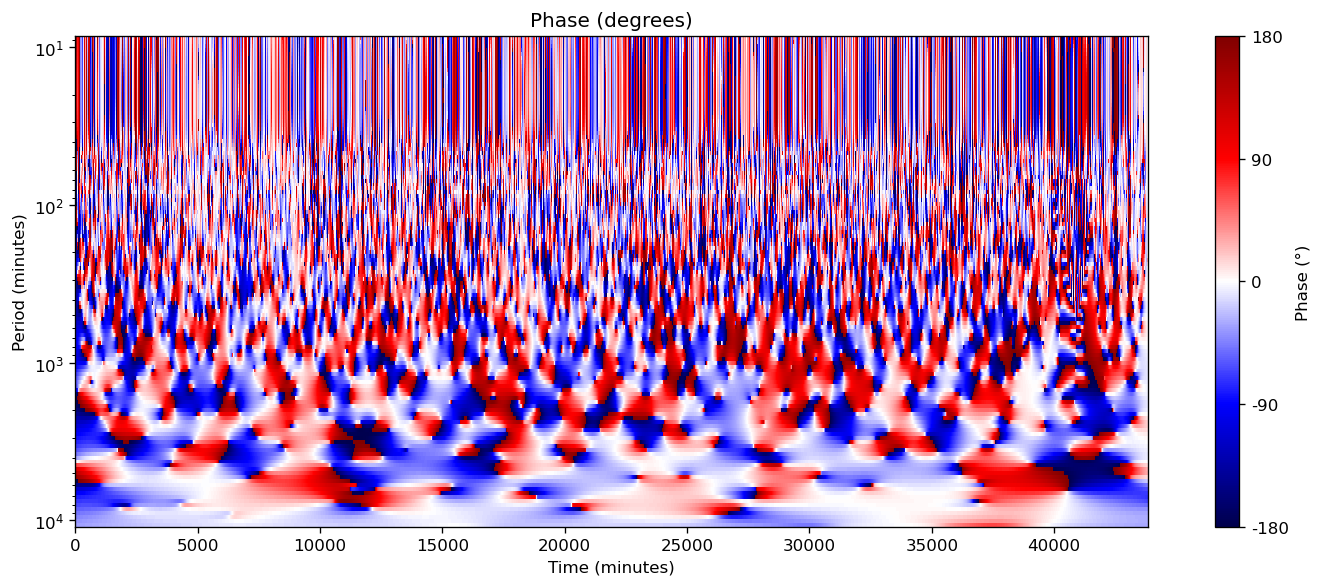

In [30]:
# --- Compute phase from cross-spectrum Sxy ---
Sxy = Wx * np.conj(Wy)  # cross-wavelet transform
phase = np.angle(Sxy)   # range: -pi to pi

# --- Plot phase map ---
fig, ax = plt.subplots(figsize=(12, 5), dpi=120)
im = ax.pcolormesh(
    t_edges, p_edges, phase,
    cmap='seismic', shading='flat', vmin=-np.pi, vmax=np.pi
)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Period (minutes)')
ax.set_title('Phase (degrees)')
ax.set_yscale('log')
ax.invert_yaxis()

# colorbar in degrees
cbar = fig.colorbar(im, ax=ax, label='Phase (°)')
cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
cbar.set_ticklabels(['-180', '-90', '0', '90', '180'])

plt.tight_layout()
plt.show()

In [31]:
THRESH = 0.75  # coherence cutoff

# Build a mask: True = exclude
mask = np.zeros_like(WCT, dtype=bool)

# 1) Exclude outside COI (periods greater than the COI curve)
if coi_period is not None:
    # periods is (Ns,), t is (Nt,)
    outside_cone = (periods[:, None] > coi_period[None, :])
    mask |= outside_cone

# 2) Exclude low coherence
mask |= (WCT < THRESH)

# Apply mask (set excluded cells to NaN so pcolormesh leaves them blank)
WCT_masked = np.where(mask, np.nan, WCT)

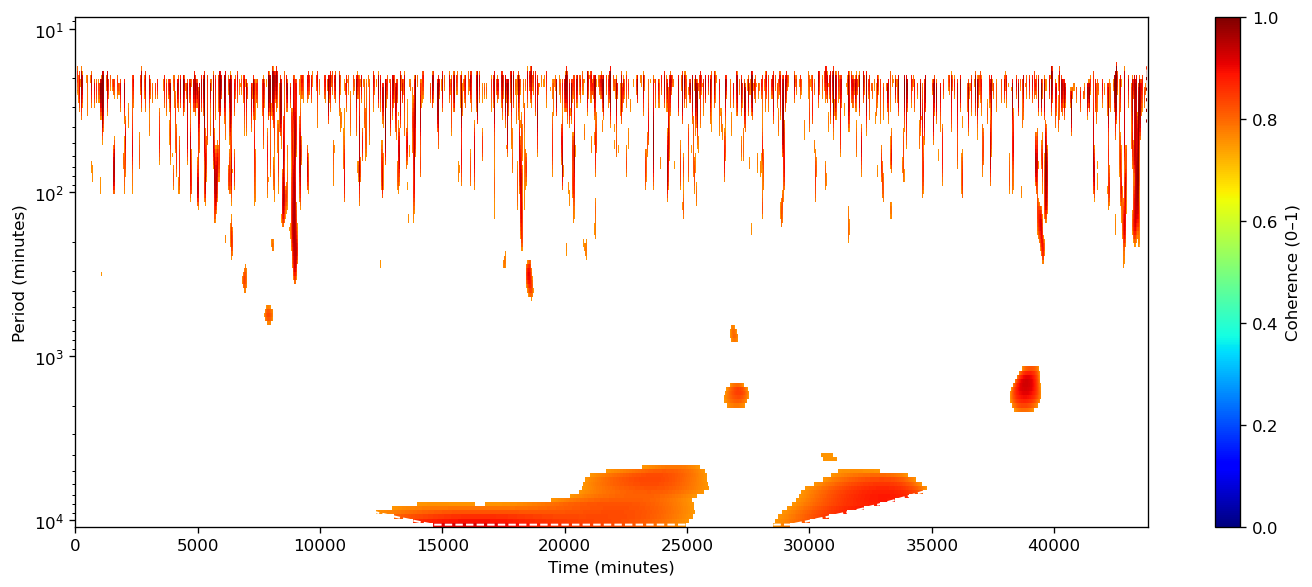

In [32]:
t_edges = centers_to_edges(t)
p_edges = centers_to_edges(periods)

fig, ax = plt.subplots(figsize=(12, 5), dpi=120)
im = ax.pcolormesh(t_edges, p_edges, WCT_masked, cmap='jet',
                   shading='flat', vmin=0, vmax=1)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Period (minutes)')
ax.set_yscale('log'); ax.invert_yaxis()
cbar = fig.colorbar(im, ax=ax, label='Coherence (0–1)')

# Draw COI line and lightly shade outside (optional cosmetic)
if coi_period is not None:
    ax.plot(t, coi_period, 'w--', lw=1.2)
    #ax.fill_between(t, coi_period, periods.max(),
    #                where=coi_period <= periods.max(),
    #                facecolor='white', alpha=0.25, hatch='//', edgecolor='none')
plt.tight_layout()
plt.show()

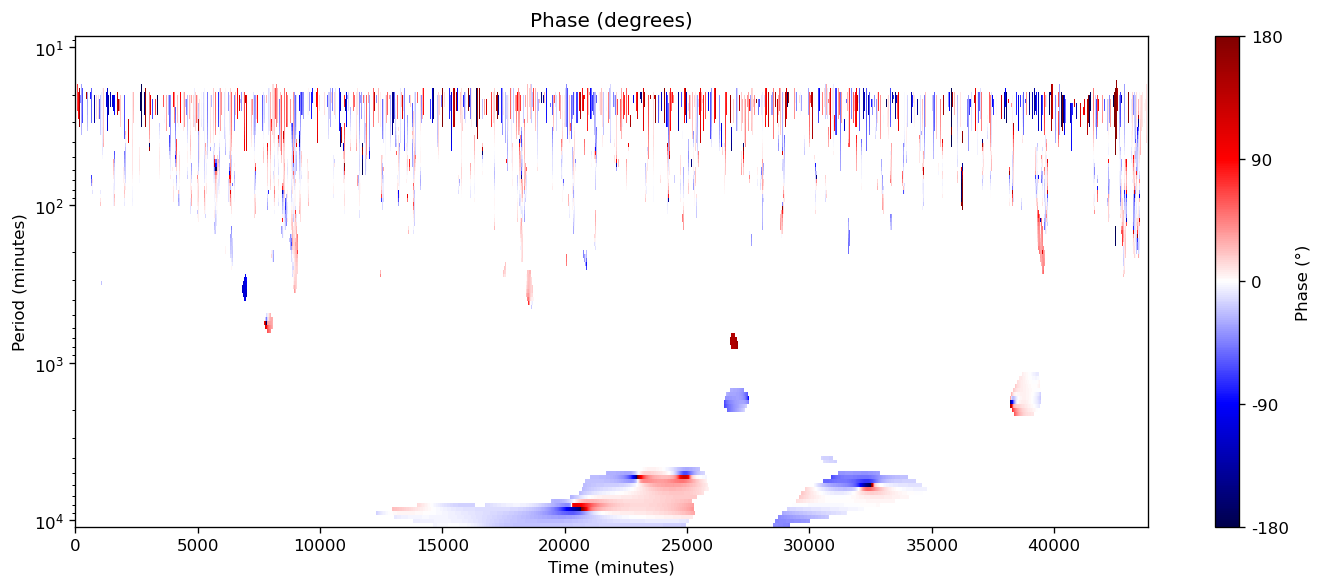

In [33]:
# Apply the same mask to phase
phase_masked = np.where(np.isnan(WCT_masked), np.nan, phase)

# --- Plot masked phase map ---
fig, ax = plt.subplots(figsize=(12, 5), dpi=120)
im = ax.pcolormesh(
    t_edges, p_edges, phase_masked,
    cmap='seismic', shading='flat', vmin=-np.pi, vmax=np.pi
)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Period (minutes)')
ax.set_title('Phase (degrees)')
ax.set_yscale('log')
ax.invert_yaxis()

# Colorbar in degrees
cbar = fig.colorbar(im, ax=ax, label='Phase (°)')
cbar.set_ticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
cbar.set_ticklabels(['-180', '-90', '0', '90', '180'])
plt.tight_layout()
plt.show()